In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_results(src_dataset, tgt_dataset, method, k_shot, n_epochs_nn=50, path_results = "./results_tf", n_projs=None):
    if n_projs is None:
        projs = ""
    else:
        projs = "_projs"+str(n_projs)
    
    path_acc = "/accuracy_" + src_dataset + "_to_" + tgt_dataset +\
               "_" + method + "_k" + str(k_shot) +\
               "_nepochsnn" + str(n_epochs_nn) + projs

    L_acc = np.loadtxt(path_results + path_acc, delimiter=",")
    print("Accuracy:", np.mean(L_acc), np.std(L_acc))


    path_acc_baseline = "/accuracy_baseline_" + src_dataset + "_to_" +\
                        tgt_dataset + "_k" + str(k_shot) +\
                        "_nepochsnn" + str(n_epochs_nn)
    L_acc_baseline = np.loadtxt(path_results + path_acc_baseline, delimiter=",")
    print("Baseline:", np.mean(L_acc_baseline), np.std(L_acc_baseline))


def show_imgs(src_dataset, tgt_dataset, method, k_shot, n_epochs_nn=50, save=False,
              path_results = "./results_tf", n_projs=None, path_save="./"):
    if n_projs is None:
        projs = ""
    else:
        projs = "_projs"+str(n_projs)
    
    path_imgs = "/synth_images_" + src_dataset + "_to_" + tgt_dataset +\
                "_" + method + "_k" + str(k_shot) +\
                "_nepochsnn" + str(n_epochs_nn) + projs + ".npy"

    imgs = np.load(path_results + path_imgs)
 
    if tgt_dataset == "CIFAR10":
        # labels = ["Plane", "Car", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]
        mean = [0.4914, 0.4822, 0.4465]
        std = [0.2023, 0.1994, 0.2010]

    if tgt_dataset in ["MNIST", "FMNIST", "KMNIST", "USPS"]:
        imgs = np.clip(np.transpose(imgs, (1,0,2)).reshape(-1,28,28), 0, 1)
    elif tgt_dataset == "CIFAR10":
        imgs = np.transpose(imgs, (1,0,2)).reshape(-1, 3, 32, 32)
        
        for k in range(3):
            imgs[:,k] = imgs[:,k] * std[k] + mean[k]
            
        imgs = np.clip(np.transpose(imgs, (0, 2, 3, 1)), 0, 1)
    
    # Create the plot
    fig, axes = plt.subplots(10, 10, figsize=(10, 10))  # 10x10 grid
    fig.subplots_adjust(hspace=0, wspace=0.05)  # Add spacing between rows
    
    for i, ax in enumerate(axes.flat):
        if tgt_dataset in ["MNIST", "FMNIST", "KMNIST", "USPS"]:
            ax.imshow(imgs[i], cmap='gray')  # Adjust cmap if images are in color
        else:
            ax.imshow(imgs[i])

        ax.axis('off')  # Hide axes for clean visualization
        
    if save:
        plt.savefig(path_save + "imgs_tf_" + src_dataset + "_to_" + tgt_dataset + "_" + method + "_k" + str(k_shot) + ".pdf",
                    format="pdf", bbox_inches='tight')
    
    plt.show()

### 1D Busemann SW 

In [3]:
src_dataset = "MNIST"
tgt_dataset = "FMNIST"
method = "busemann_1d_semi_gaussian"
path_results = "results_tf_busemann/epochs_"
# k_shot = 5
n_epochs_nn = 50

k_shot = 10

n_projs = 500

for k_shot in [1,5,10,100]:
    for n_projs in [500, 1000, 5000, 10000]:
        for n_epochs in [100,200,500,1000,10000,20000,100000]: #,200000]:
            print("k_shot = " + str(k_shot), "epochs = " + str(n_epochs), "n_projs = " + str(n_projs))
            get_results(src_dataset, tgt_dataset, method, k_shot, n_epochs_nn, path_results=path_results + str(n_epochs), n_projs=n_projs)
            print()
    print("----------")
    print()


k_shot = 1 epochs = 100 n_projs = 500
Accuracy: 0.09986066867907842 0.0003057783380690602
Baseline: 0.26025743087132774 0.05294308350451327

k_shot = 1 epochs = 200 n_projs = 500
Accuracy: 0.2380772312482198 0.032418207827403185
Baseline: 0.26003848314285277 0.05290191334145917

k_shot = 1 epochs = 500 n_projs = 500
Accuracy: 0.27419055898984274 0.03678624207009209
Baseline: 0.2601380079984665 0.05321097532638254

k_shot = 1 epochs = 1000 n_projs = 500
Accuracy: 0.3921311100323995 0.036442989147085644
Baseline: 0.260217629869779 0.053107153942329566

k_shot = 1 epochs = 10000 n_projs = 500
Accuracy: 0.39748541116714475 0.042196788467773375
Baseline: 0.2602375328540802 0.052964164532999625

k_shot = 1 epochs = 20000 n_projs = 500
Accuracy: 0.39686173796653745 0.04496075787295061
Baseline: 0.26045648455619813 0.05317617645410607

k_shot = 1 epochs = 100000 n_projs = 500
Accuracy: 0.3989185293515523 0.045486903502249286
Baseline: 0.2604166696468989 0.05305850560524369

k_shot = 1 epochs =

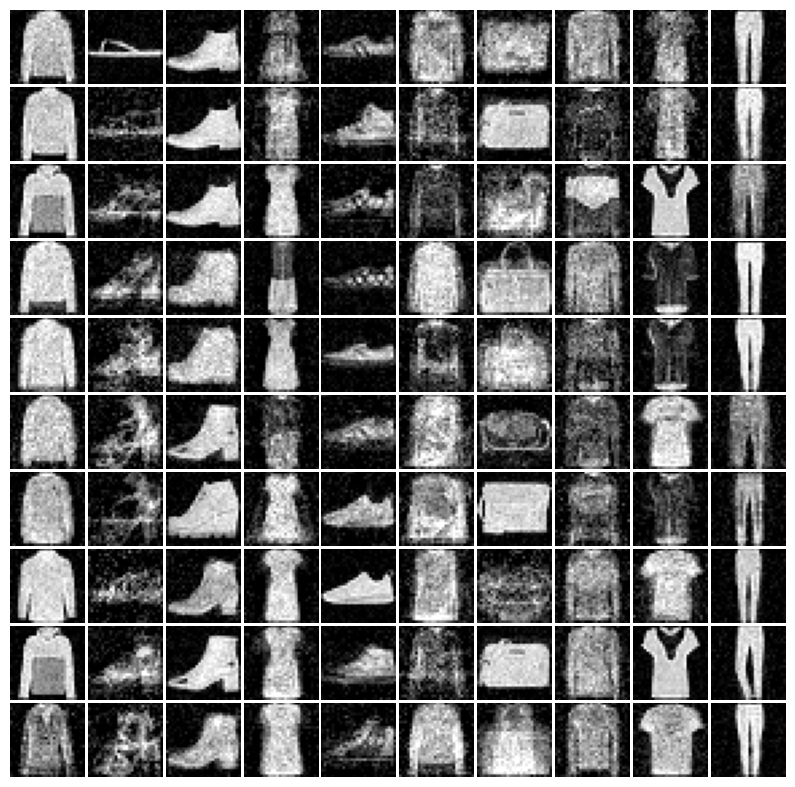

In [6]:
show_imgs(src_dataset, tgt_dataset, method, 10, n_epochs_nn, path_results=path_results+str(10000),
          path_save="./Figures_best/", n_projs=1000, save=False)

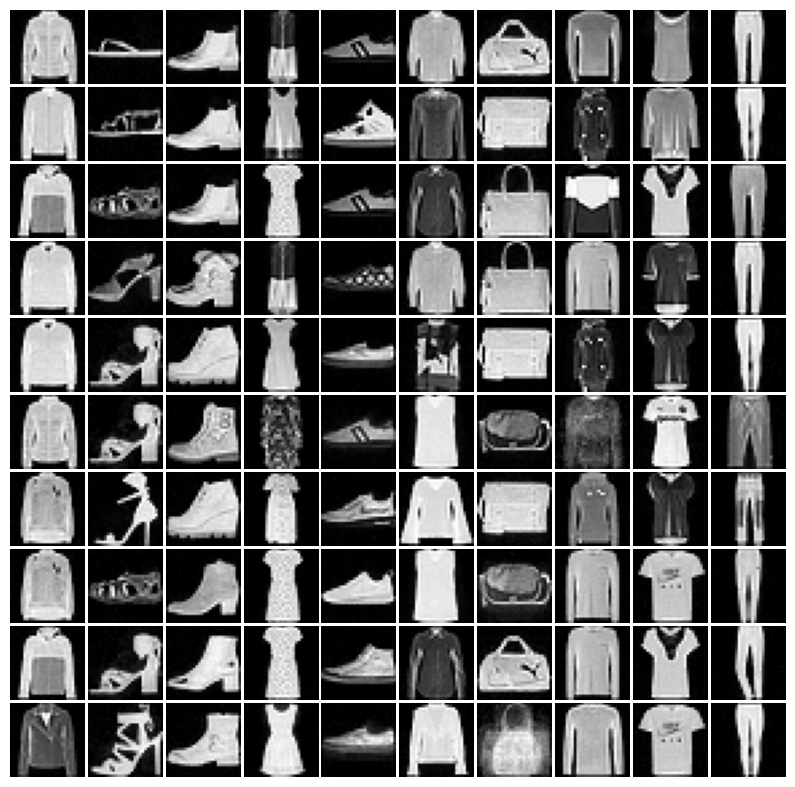

In [5]:
show_imgs(src_dataset, tgt_dataset, method, 10, n_epochs_nn, path_results=path_results+str(100000),
          n_projs=10000, path_save="./Figures_100K_epochs/", save=False)

In [7]:
src_dataset = "MNIST"
tgt_dataset = "KMNIST"
method = "busemann_1d_semi_gaussian"
path_results = "results_tf_busemann/epochs_"
# k_shot = 5
n_epochs_nn = 50

k_shot = 10

n_projs = 500

for k_shot in [1,5,10,100]:
    for n_projs in [500, 1000, 5000, 10000]:
        for n_epochs in [500,1000,10000,20000]: #,100000]: #,200000]:
            print("k_shot = " + str(k_shot), "epochs = " + str(n_epochs), "n_projs = " + str(n_projs))
            get_results(src_dataset, tgt_dataset, method, k_shot, n_epochs_nn, path_results=path_results + str(n_epochs), n_projs=n_projs)
            print()
    print("----------")
    print()


k_shot = 1 epochs = 500 n_projs = 500
Accuracy: 0.14912420610586802 0.014052594228390863
Baseline: 0.18359872996807097 0.031193538695149417

k_shot = 1 epochs = 1000 n_projs = 500
Accuracy: 0.19534899393717448 0.016248706102650265
Baseline: 0.18365844289461772 0.031022760398541845

k_shot = 1 epochs = 10000 n_projs = 500
Accuracy: 0.20707935492197674 0.018604953312408867
Baseline: 0.1837380607922872 0.031099024799819675

k_shot = 1 epochs = 20000 n_projs = 500
Accuracy: 0.20707272092501322 0.02009298097008247
Baseline: 0.18395700852076213 0.031221160484748826

k_shot = 1 epochs = 500 n_projs = 1000
Accuracy: 0.15232218901316324 0.019323082327289902
Baseline: 0.18359872996807097 0.031193538695149417

k_shot = 1 epochs = 1000 n_projs = 1000
Accuracy: 0.19272824227809907 0.020790074862675974
Baseline: 0.18365844289461772 0.031022760398541845

k_shot = 1 epochs = 10000 n_projs = 1000
Accuracy: 0.20581210454305013 0.01619025008574517
Baseline: 0.1837380607922872 0.031099024799819675

k_shot

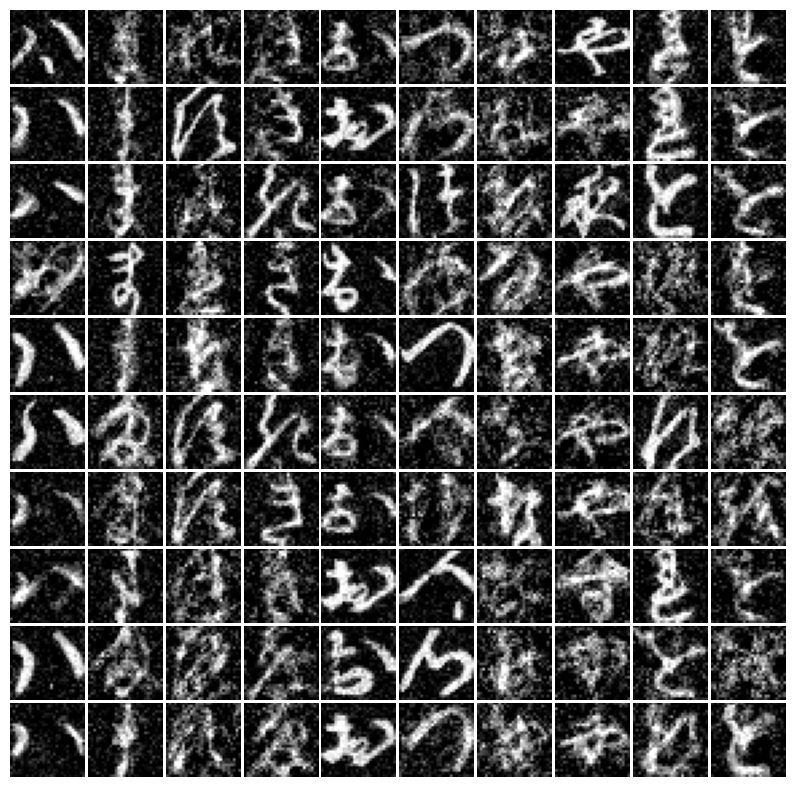

In [8]:
show_imgs(src_dataset, tgt_dataset, method, 10, n_epochs_nn, path_results=path_results+str(20000),
          path_save="./Figures_best/", n_projs=500, save=False)

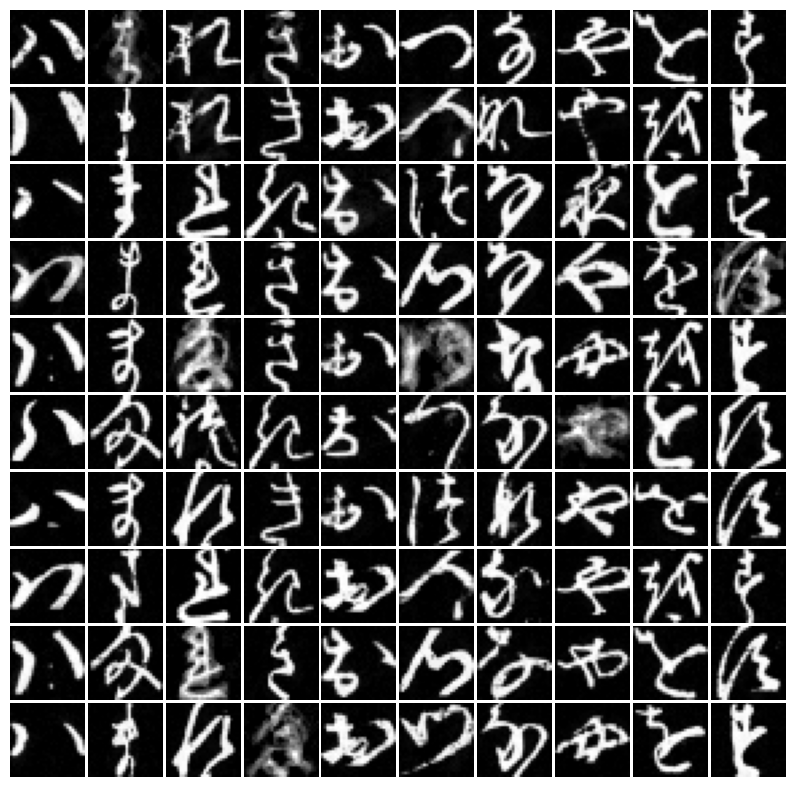

In [9]:
show_imgs(src_dataset, tgt_dataset, method, 10, n_epochs_nn, path_results=path_results+str(100000),
          n_projs=10000, path_save="./Figures_100K_epochs/", save=False)

In [9]:
src_dataset = "MNIST"
tgt_dataset = "USPS"
method = "busemann_1d_semi_gaussian"
path_results = "results_tf_busemann/epochs_"
# k_shot = 5
n_epochs_nn = 50

k_shot = 10

n_projs = 500

for k_shot in [1,5,10,100]:
    for n_projs in [500, 1000, 5000, 10000]:
        for n_epochs in [500,1000,10000,20000]: #,100000]: #,200000]:
            print("k_shot = " + str(k_shot), "epochs = " + str(n_epochs), "n_projs = " + str(n_projs))
            get_results(src_dataset, tgt_dataset, method, k_shot, n_epochs_nn, path_results=path_results + str(n_epochs), n_projs=n_projs)
            print()
    print("----------")
    print()


k_shot = 1 epochs = 500 n_projs = 500
Accuracy: 0.29411231974760693 0.03671897056415648
Baseline: 0.32584352095921837 0.07915565159462025

k_shot = 1 epochs = 1000 n_projs = 500
Accuracy: 0.44470816254615786 0.04664021042499848
Baseline: 0.3251769145329793 0.07960368756540966

k_shot = 1 epochs = 10000 n_projs = 500
Accuracy: 0.36798431873321535 0.06684192745057221
Baseline: 0.3245640863974889 0.07879132787382505

k_shot = 1 epochs = 20000 n_projs = 500
Accuracy: 0.35600373645623523 0.07178539937764149
Baseline: 0.3252632528543472 0.07912585456527009

k_shot = 1 epochs = 500 n_projs = 1000
Accuracy: 0.33263275523980457 0.03619497304852914
Baseline: 0.32584352095921837 0.07915565159462025

k_shot = 1 epochs = 1000 n_projs = 1000
Accuracy: 0.448798406124115 0.04955958251733024
Baseline: 0.3251769145329793 0.07960368756540966

k_shot = 1 epochs = 10000 n_projs = 1000
Accuracy: 0.36127717097600304 0.06958211971619456
Baseline: 0.3245640863974889 0.07879132787382505

k_shot = 1 epochs = 200

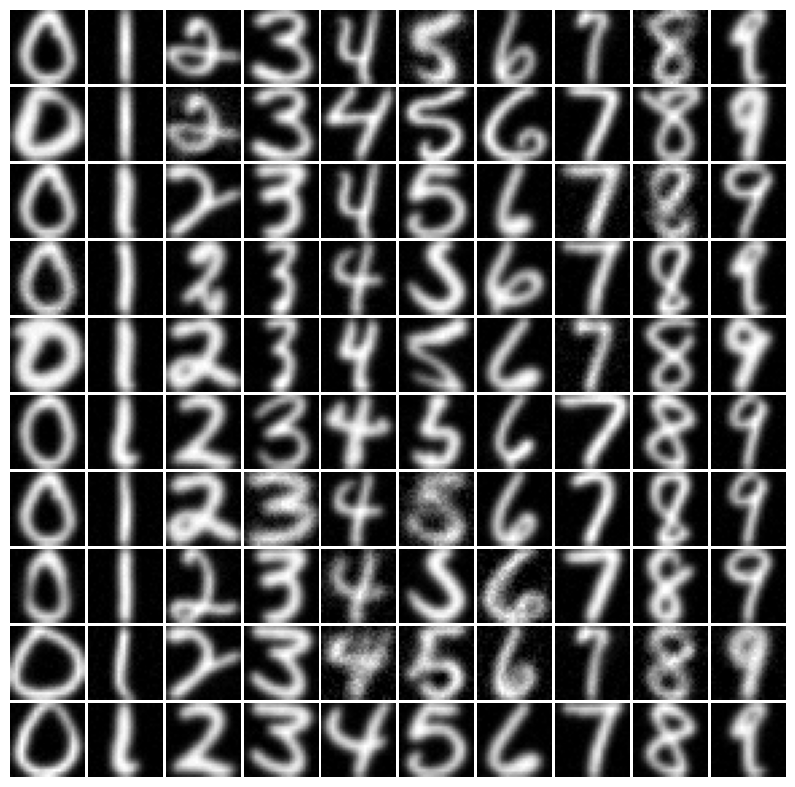

In [10]:
show_imgs(src_dataset, tgt_dataset, method, 10, n_epochs_nn, path_results=path_results+str(20000),
          path_save="./Figures_best/", n_projs=1000, save=False)

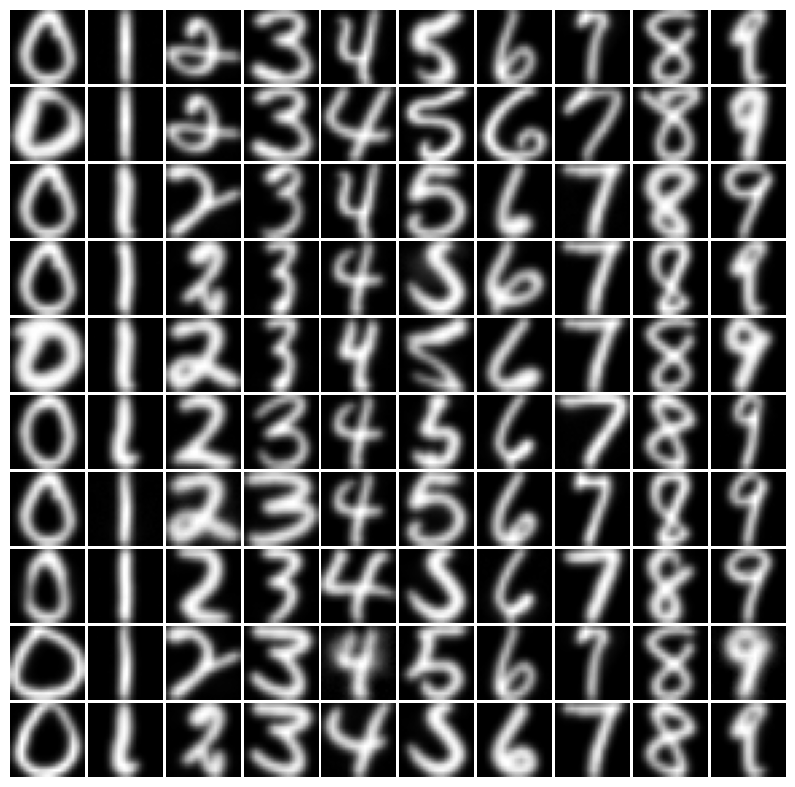

In [12]:
show_imgs(src_dataset, tgt_dataset, method, 10, n_epochs_nn, path_results=path_results+str(100000),
          n_projs=10000, path_save="./Figures_100K_epochs/", save=False)

### Sliced OTDD

In [11]:
src_dataset = "MNIST"
tgt_dataset = "FMNIST"
method = "sliced_otdd"
path_results = "results_tf_busemann/epochs_"
# k_shot = 5
n_epochs_nn = 50

k_shot = 10

n_projs = 500

for k_shot in [1,5,10,100]:
    for n_projs in [500, 1000, 5000, 10000]:
        for n_epochs in [100,200,500,1000,10000,20000,100000]: #,100000,200000]:
            print("k_shot = " + str(k_shot), "epochs = " + str(n_epochs), "n_projs = " + str(n_projs))
            get_results(src_dataset, tgt_dataset, method, k_shot, n_epochs_nn, path_results=path_results + str(n_epochs), n_projs=n_projs)
            print()

    print("----------")
    print()


k_shot = 1 epochs = 100 n_projs = 500
Accuracy: 0.12959129810333253 0.026099441579191876
Baseline: 0.26025743087132774 0.05294308350451327

k_shot = 1 epochs = 200 n_projs = 500
Accuracy: 0.17335456560055415 0.0400651063853238
Baseline: 0.26003848314285277 0.05290191334145917

k_shot = 1 epochs = 500 n_projs = 500
Accuracy: 0.2630639602740606 0.03826560575829811
Baseline: 0.2601380079984665 0.05321097532638254

k_shot = 1 epochs = 1000 n_projs = 500
Accuracy: 0.41965897878011066 0.017378066154421466
Baseline: 0.260217629869779 0.053107153942329566

k_shot = 1 epochs = 10000 n_projs = 500
Accuracy: 0.4098858853181203 0.03408144859351709
Baseline: 0.2602375328540802 0.052964164532999625

k_shot = 1 epochs = 20000 n_projs = 500
Accuracy: 0.4084262231985728 0.03348885896588361
Baseline: 0.26045648455619813 0.05317617645410607

k_shot = 1 epochs = 100000 n_projs = 500
Accuracy: 0.4086783508459727 0.03710801704966738
Baseline: 0.2604166696468989 0.05305850560524369

k_shot = 1 epochs = 100 n

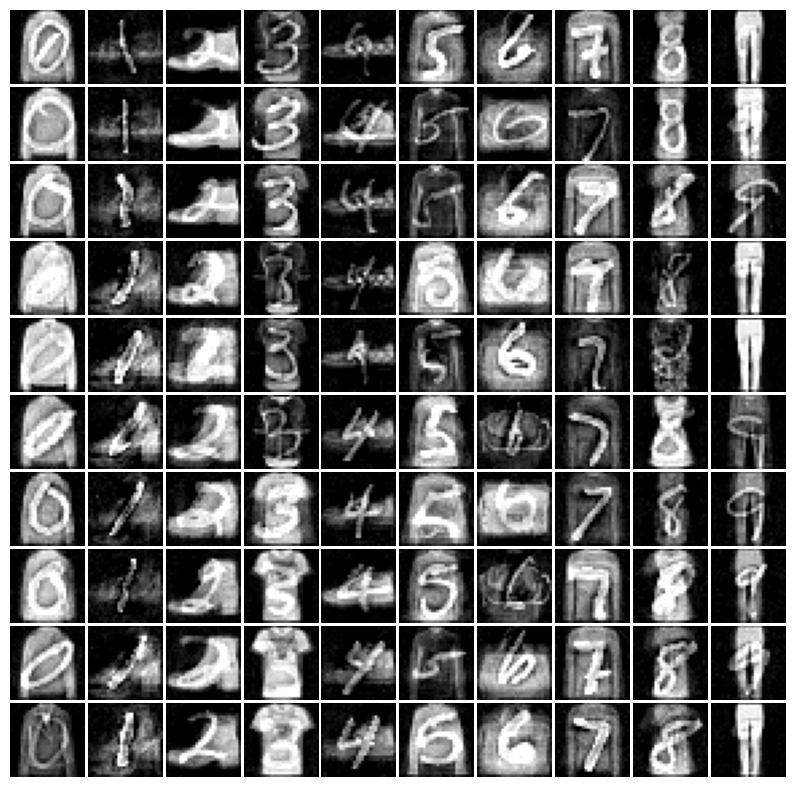

In [12]:
show_imgs(src_dataset, tgt_dataset, method, 10, n_epochs_nn, path_results=path_results+str(10000),
          path_save="./Figures_best/", n_projs=10000, save=False)

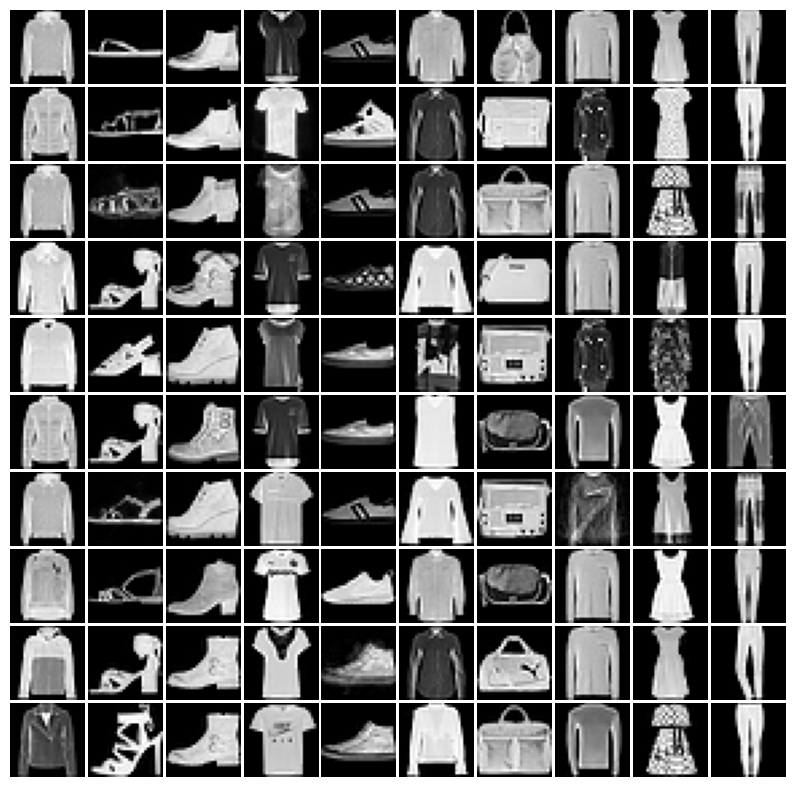

In [20]:
show_imgs(src_dataset, tgt_dataset, method, 10, n_epochs_nn, path_results=path_results+str(100000),
          n_projs=10000, path_save="./Figures_100K_epochs/", save=False)

In [13]:
src_dataset = "MNIST"
tgt_dataset = "KMNIST"
method = "sliced_otdd"
path_results = "results_tf_busemann/epochs_"
# k_shot = 5
n_epochs_nn = 50

k_shot = 10

n_projs = 500

for k_shot in [1,5,10,100]:
    for n_projs in [500, 1000, 5000, 10000]:
        for n_epochs in [500,1000,10000,20000]: #,100000]: #,100000,200000]:
            print("k_shot = " + str(k_shot), "epochs = " + str(n_epochs), "n_projs = " + str(n_projs))
            get_results(src_dataset, tgt_dataset, method, k_shot, n_epochs_nn, path_results=path_results + str(n_epochs), n_projs=n_projs)
            print()

    print("----------")
    print()


k_shot = 1 epochs = 500 n_projs = 500
Accuracy: 0.17582935392856597 0.017805405940211766
Baseline: 0.18359872996807097 0.031193538695149417

k_shot = 1 epochs = 1000 n_projs = 500
Accuracy: 0.1869625836610794 0.013889395821059759
Baseline: 0.18365844289461772 0.031022760398541845

k_shot = 1 epochs = 10000 n_projs = 500
Accuracy: 0.2105825404326121 0.022332159837394294
Baseline: 0.1837380607922872 0.031099024799819675

k_shot = 1 epochs = 20000 n_projs = 500
Accuracy: 0.21094745298226675 0.020039609301939945
Baseline: 0.18395700852076213 0.031221160484748826

k_shot = 1 epochs = 500 n_projs = 1000
Accuracy: 0.17133758167425792 0.015373098579323832
Baseline: 0.18359872996807097 0.031193538695149417

k_shot = 1 epochs = 1000 n_projs = 1000
Accuracy: 0.19211120009422303 0.013696990909608698
Baseline: 0.18365844289461772 0.031022760398541845

k_shot = 1 epochs = 10000 n_projs = 1000
Accuracy: 0.2104896515607834 0.02047177684413531
Baseline: 0.1837380607922872 0.031099024799819675

k_shot =

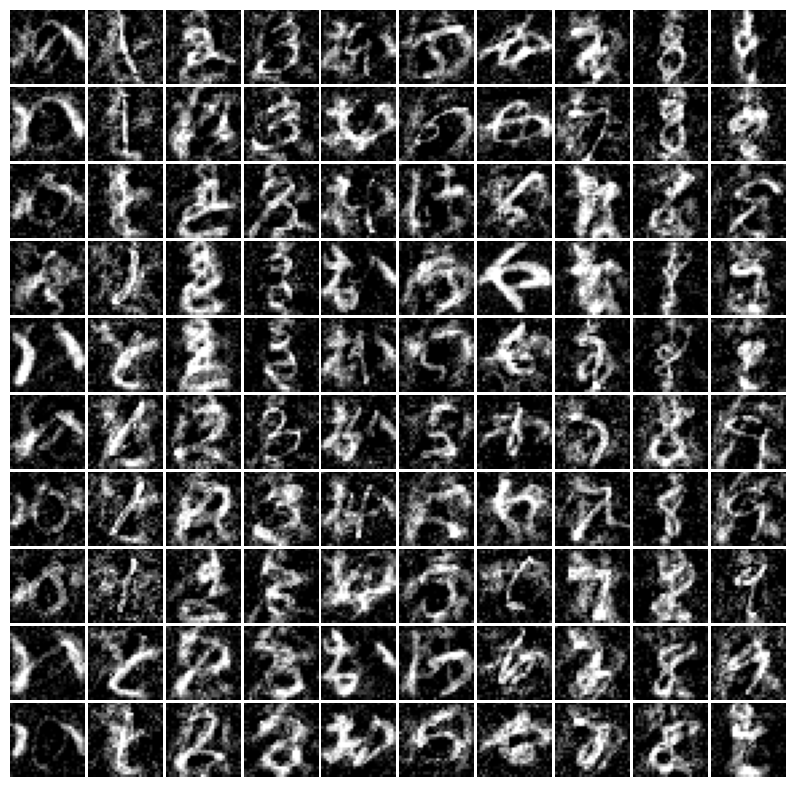

In [14]:
show_imgs(src_dataset, tgt_dataset, method, 10, n_epochs_nn, path_results=path_results+str(20000),
          path_save="./Figures_best/", n_projs=1000, save=False)

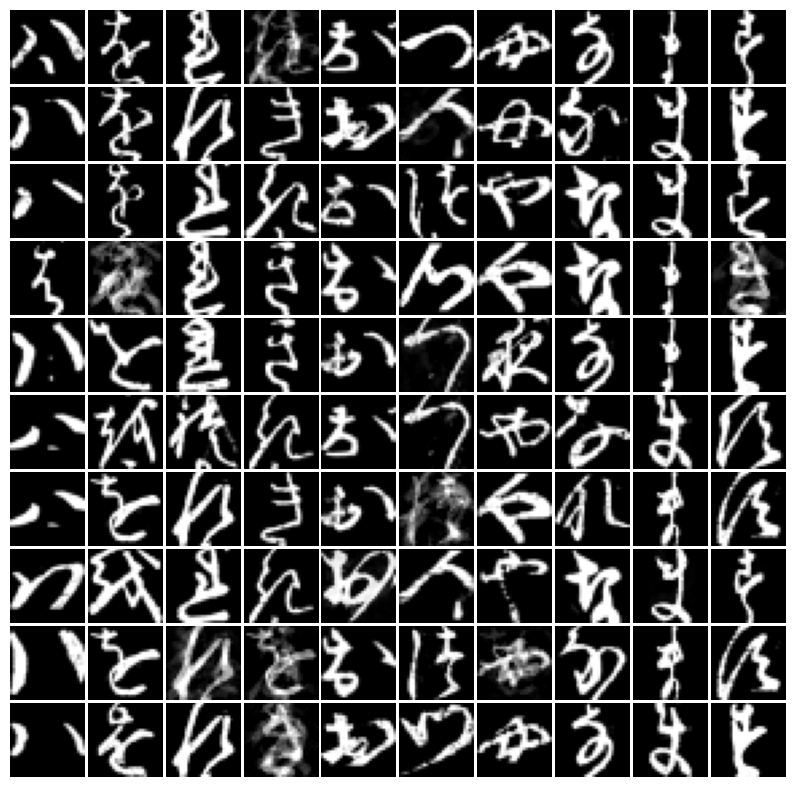

In [23]:
show_imgs(src_dataset, tgt_dataset, method, 10, n_epochs_nn, path_results=path_results+str(100000),
          n_projs=10000, path_save="./Figures_100K_epochs/", save=False)

In [15]:
src_dataset = "MNIST"
tgt_dataset = "USPS"
method = "sliced_otdd"
path_results = "results_tf_busemann/epochs_"
# k_shot = 5
n_epochs_nn = 50

k_shot = 10

n_projs = 500

for k_shot in [1,5,10,100]:
    for n_projs in [500, 1000, 5000, 10000]:
        for n_epochs in [500,1000,10000,20000]: #,100000]: #,100000,200000]:
            print("k_shot = " + str(k_shot), "epochs = " + str(n_epochs), "n_projs = " + str(n_projs))
            get_results(src_dataset, tgt_dataset, method, k_shot, n_epochs_nn, path_results=path_results + str(n_epochs), n_projs=n_projs)
            print()

    print("----------")
    print()


k_shot = 1 epochs = 500 n_projs = 500
Accuracy: 0.34190019170443214 0.02413103486749775
Baseline: 0.32584352095921837 0.07915565159462025

k_shot = 1 epochs = 1000 n_projs = 500
Accuracy: 0.4938349187374115 0.025395696112176236
Baseline: 0.3251769145329793 0.07960368756540966

k_shot = 1 epochs = 10000 n_projs = 500
Accuracy: 0.37470844785372415 0.0705644869299121
Baseline: 0.3245640863974889 0.07879132787382505

k_shot = 1 epochs = 20000 n_projs = 500
Accuracy: 0.3736639489730199 0.0723345747526318
Baseline: 0.3252632528543472 0.07912585456527009

k_shot = 1 epochs = 500 n_projs = 1000
Accuracy: 0.3357648352781932 0.022689969771113802
Baseline: 0.32584352095921837 0.07915565159462025

k_shot = 1 epochs = 1000 n_projs = 1000
Accuracy: 0.4857818126678467 0.03376606137815932
Baseline: 0.3251769145329793 0.07960368756540966

k_shot = 1 epochs = 10000 n_projs = 1000
Accuracy: 0.37376443843046825 0.07497460115036879
Baseline: 0.3245640863974889 0.07879132787382505

k_shot = 1 epochs = 20000

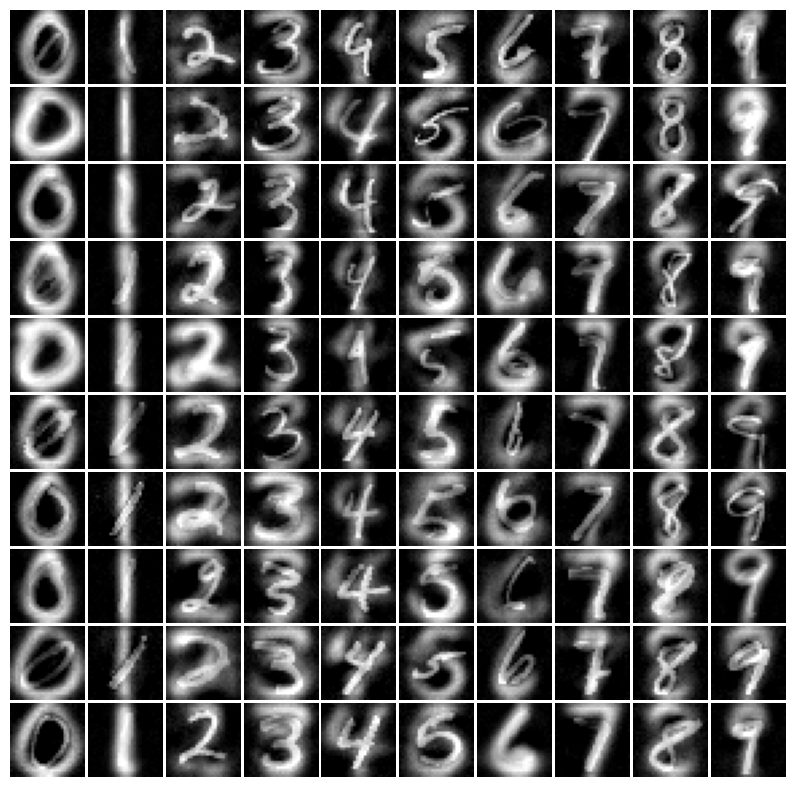

In [16]:
show_imgs(src_dataset, tgt_dataset, method, 10, n_epochs_nn, path_results=path_results+str(10000),
          path_save="./Figures_best/", n_projs=10000, save=False)

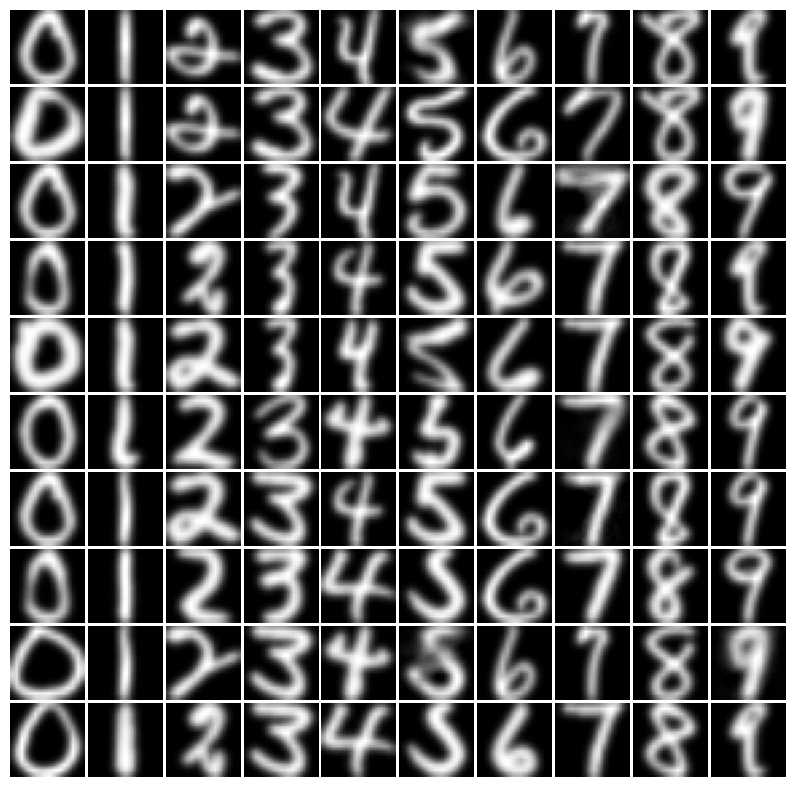

In [8]:
show_imgs(src_dataset, tgt_dataset, method, 10, n_epochs_nn, path_results=path_results+str(100000),
          n_projs=10000, path_save="./Figures_100K_epochs/", save=False)